**Attribute Information**

Age: age of the patient [years].

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


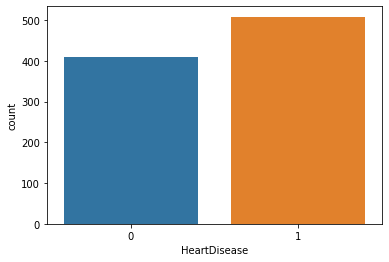

In [ ]:
import seaborn as sns
sns.countplot(x='HeartDisease',data=df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_feature = df.dtypes==object
final_categorical_feature = df.columns[categorical_feature].tolist()

label_enco = LabelEncoder() 
df[final_categorical_feature] = df[final_categorical_feature].apply(lambda col: label_enco.fit_transform(col)) 
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


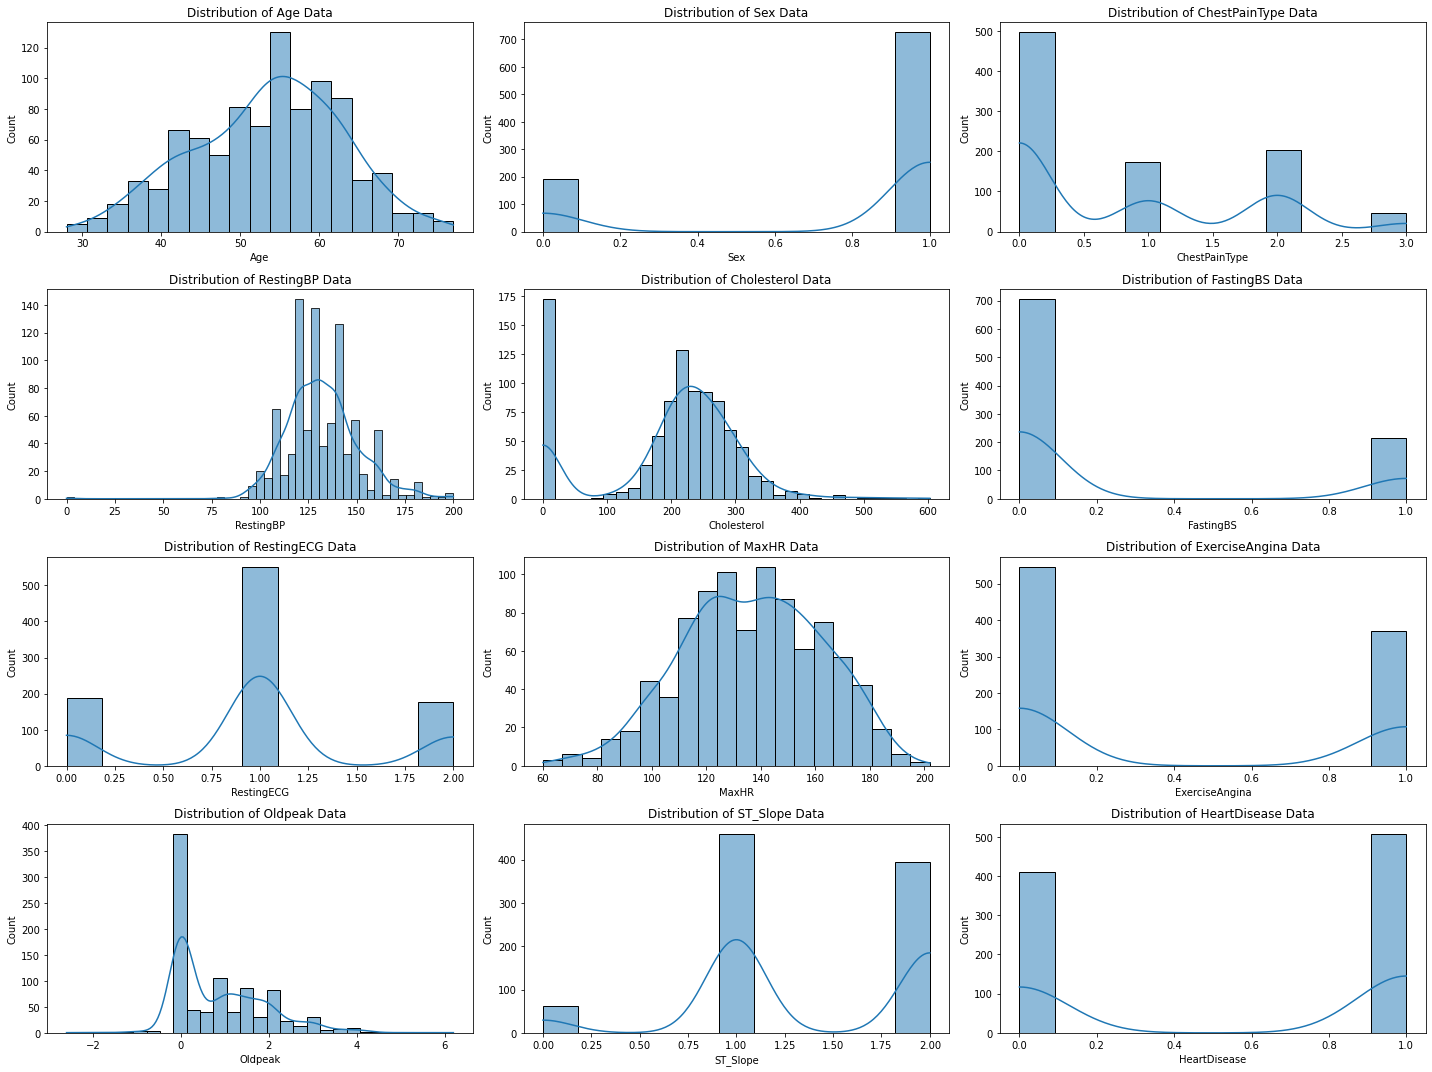

In [ ]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

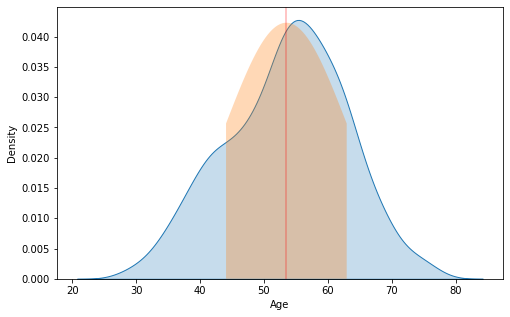

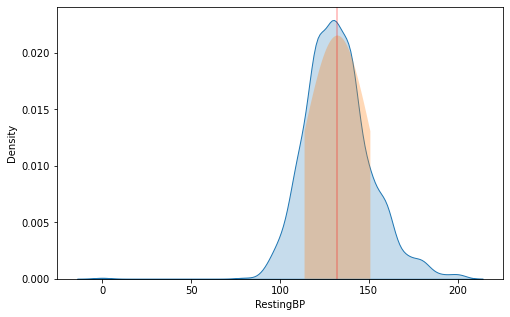

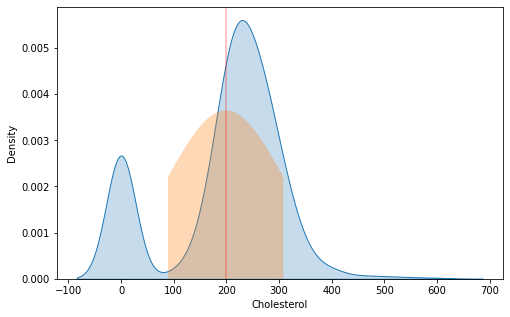

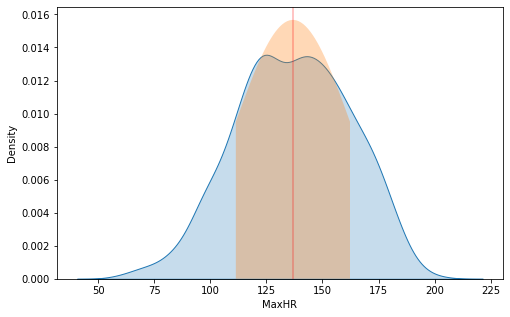

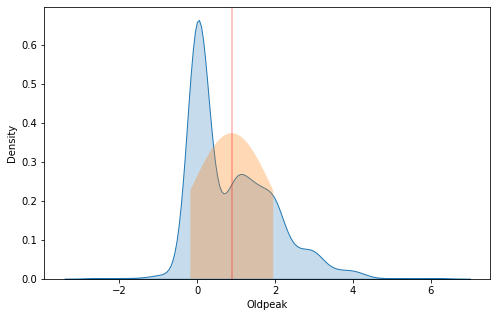

In [ ]:
import numpy as np
from scipy.stats import norm
fea = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for col in fea:
    plt.figure(figsize=(8, 5))
    ax = sns.kdeplot(df[col], shade=True)
    mean = df[col].mean()
    std = df[col].std()
    x = np.linspace(mean - std, mean + std)
    y = norm.pdf(x, mean, std)
    ax.fill_between(x, y, alpha=0.3)
    ax.axvline(mean,color='r',alpha=0.3)

In [ ]:
normal_dis = ['Age','RestingBP','MaxHR']

In [ ]:
Q1 = df.quantile(q=0.25)
Q3=df.quantile(q=0.75)
MEAN = df.mean()
STD = df.std()
Inter_Q = Q3-Q1

In [ ]:

def plot_box(df, col):
    print("*********************** {} ***********************\n".format(col))
    if col in normal_dis:
       print("lower outlier: {} ****** upper outlier: {}\n".format(count_lower_outlier_norm(df,col).shape[0], count_upper_outlier_norm(df,col).shape[0]))
    else:
       print("lower outlier: {} ****** upper outlier: {}\n".format(count_lower_outlier_skew(df,col).shape[0], count_upper_outlier_skew(df,col).shape[0]))
    plt.figure(figsize=(8,6))
    df[col].plot(kind='box',vert=False)
    plt.show()
def count_lower_outlier_norm(df, col):
  lower = df[df[col]<MEAN[col]-3*STD[col]]
  return lower

def count_upper_outlier_norm(df, col):
  upper = df[df[col]>MEAN[col]+3*STD[col]]
  return upper

def count_lower_outlier_skew(df, col):
    lower = df[(df[col] < (Q1[col]- 1.5 * Inter_Q[col]))]
    return lower

def count_upper_outlier_skew(df, col):
    upper = df[(df[col] > (Q3[col] + 1.5 * Inter_Q[col]))]
    return upper

*********************** Age ***********************

lower outlier: 0 ****** upper outlier: 0



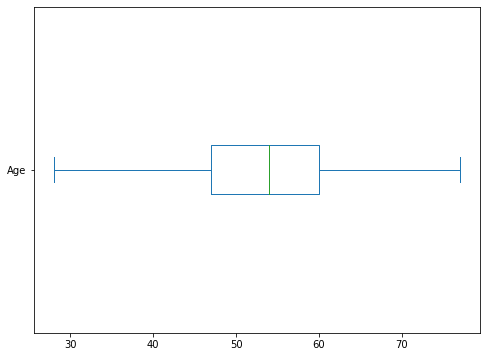

*********************** RestingBP ***********************

lower outlier: 1 ****** upper outlier: 7



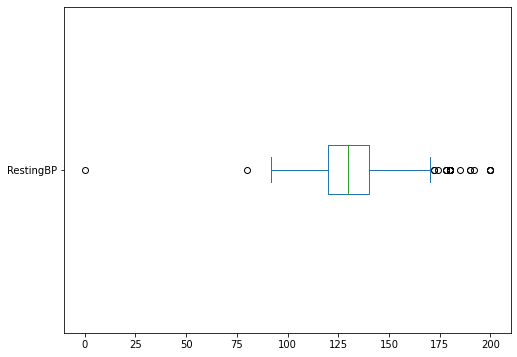

*********************** Cholesterol ***********************

lower outlier: 172 ****** upper outlier: 11



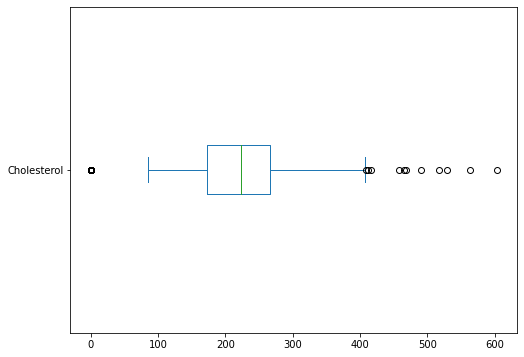

*********************** MaxHR ***********************

lower outlier: 1 ****** upper outlier: 0



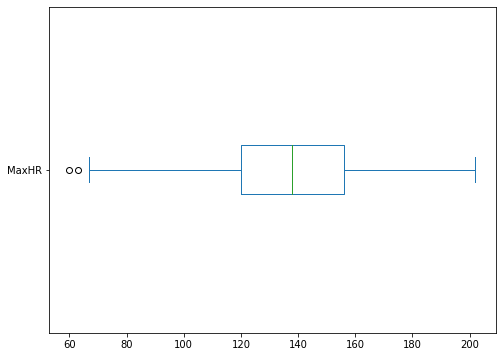

*********************** Oldpeak ***********************

lower outlier: 1 ****** upper outlier: 15



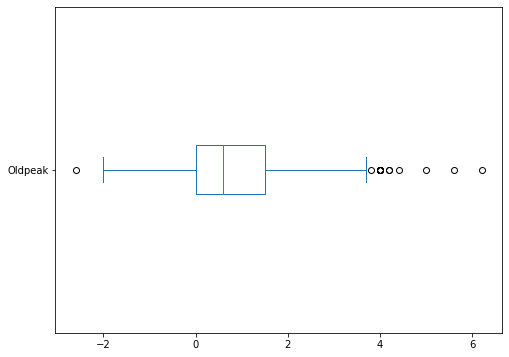

In [ ]:
for i in range(len(fea)):
    plot_box(df[fea], fea[i])

In [ ]:
def replace_upper(df, col):
    tmp = 9999999
    upper = Q3[col] + 1.5 * Inter_Q[col]
    df[col] = df[col].where(lambda x: (x < (upper)), tmp)
    df[col] = df[col].replace(tmp, upper)

def replace_lower(df, col):
    tmp = 0.00001
    lower = Q1[col] - 1.5 * Inter_Q[col]
    df[col] = df[col].where(lambda x: (x > (lower)), tmp)
    df[col] = df[col].replace(tmp, lower)
    

def replace_upper_norm(df, col):
    tmp = 9999999
    upper = MEAN[col]+3*STD[col]
    df[col] = df[col].where(lambda x: (x < (upper)), tmp)
    df[col] = df[col].replace(tmp, upper)

def replace_lower_norm(df, col):

    tmp = 0.00001
    lower = MEAN[col]-3*STD[col]
    df[col] = df[col].where(lambda x: (x > (lower)), tmp)
    df[col] = df[col].replace(tmp, lower)
   

In [ ]:
outlier = ['RestingBP','Cholesterol','MaxHR','Oldpeak']
for col in outlier:
  if col in normal_dis:
    replace_upper_norm(df, col)
  else:
    replace_upper(df,col) 
    
for col in outlier:
  if col in normal_dis:
    replace_lower_norm(df, col)
  else:
    replace_lower(df,col)

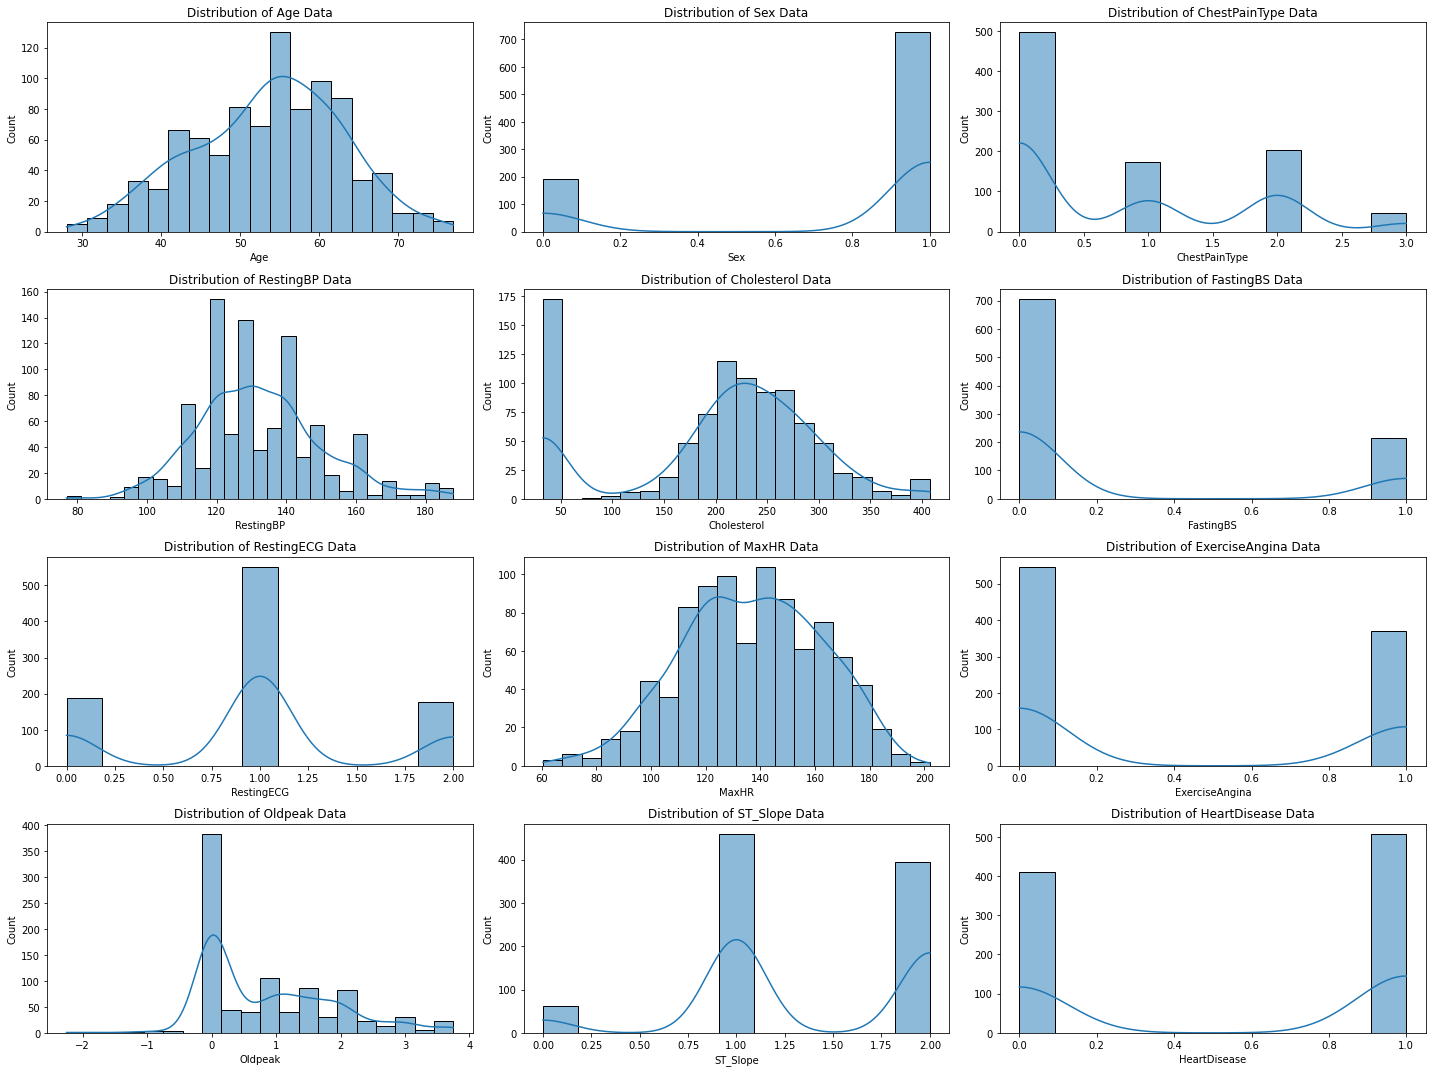

In [ ]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [ ]:
x = df.drop("HeartDisease", axis = 1)
y = df['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.25)
print(y_train.value_counts())

1    381
0    307
Name: HeartDisease, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
col = ['Age', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'RestingECG', 'MaxHR', 'Oldpeak', 'ST_Slope']

x_train[col] = scale.fit_transform(x_train[col])
x_test[col] = scale.transform(x_test[col])

In [ ]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
256,0.551020,0,0.333333,0.463225,0.963667,0,0.0,0.665606,0,0.375000,1.0
845,0.673469,0,0.000000,0.602192,0.731667,0,0.0,0.635882,1,0.541667,0.5
37,0.265306,0,0.333333,0.277935,0.579667,0,1.0,0.606158,0,0.375000,1.0
163,0.285714,1,0.333333,0.370580,0.435667,0,0.5,0.665606,0,0.375000,1.0
773,0.571429,1,1.000000,0.370580,0.427667,0,0.0,0.754777,0,0.691667,0.5
...,...,...,...,...,...,...,...,...,...,...,...
473,0.653061,1,0.666667,0.565134,0.755667,1,1.0,0.457538,1,0.658333,0.5
148,0.448980,1,0.333333,0.370580,0.361000,0,0.5,0.739915,0,0.375000,1.0
873,0.734694,1,0.666667,0.555870,0.806333,0,0.5,0.725053,0,0.375000,1.0
108,0.448980,1,0.000000,0.555870,0.257000,0,0.5,0.554141,0,0.375000,1.0


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score,classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=0)
DT.fit(x_train, y_train)

y_test_pred_DT = DT.predict(x_test)
y_train_pred_DT = DT.predict(x_train)

test_acc_DT = accuracy_score(y_test, y_test_pred_DT)
train_acc_DT = accuracy_score(y_train, y_train_pred_DT)
scores_DT = cross_val_score(DT, x_train , y_train , cv = 10, scoring = 'accuracy' )

precision_score_DT = precision_score(y_test, y_test_pred_DT)
recall_score_DT = recall_score(y_test, y_test_pred_DT)
f1_score_DT = f1_score(y_test, y_test_pred_DT)
conf_DT = confusion_matrix(y_test, y_test_pred_DT)


print("Tain set Accuracy: ", train_acc_DT)
print("Test set Accuracy: ", test_acc_DT)
print("cv:  %s\n"% scores_DT.mean())
print("************************************************")
print("precision_score: ", precision_score_DT)
print("recall_score: ", recall_score_DT)
print("f1_score: ", f1_score_DT)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_DT))

Tain set Accuracy:  0.9011627906976745
Test set Accuracy:  0.8173913043478261
cv:  0.8342071611253197

************************************************
precision_score:  0.8244274809160306
recall_score:  0.8503937007874016
f1_score:  0.8372093023255814
************************************************

Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       103
           1       0.82      0.85      0.84       127

    accuracy                           0.82       230
   macro avg       0.82      0.81      0.81       230
weighted avg       0.82      0.82      0.82       230




In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_estimators=25,
                       random_state=0)

RF.fit(x_train, y_train)

y_test_pred_RF = RF.predict(x_test)
y_train_pred_RF = RF.predict(x_train)

test_acc_RF = accuracy_score(y_test, y_test_pred_RF)
train_acc_RF = accuracy_score(y_train, y_train_pred_RF)
scores_RF= cross_val_score(RF, x_train , y_train , cv = 10, scoring = 'accuracy' )

precision_score_RF = precision_score(y_test, y_test_pred_RF)
recall_score_RF = recall_score(y_test, y_test_pred_RF)
f1_score_RF = f1_score(y_test, y_test_pred_RF)
conf_RF = confusion_matrix(y_test, y_test_pred_RF)


print("Tain set Accuracy: ", train_acc_RF)
print("Test set Accuracy: ", test_acc_RF)
print("cv:  %s\n"% scores_RF.mean())
print("************************************************")
print("precision_score: ", precision_score_RF)
print("recall_score: ", recall_score_RF)
print("f1_score: ", f1_score_RF)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_RF))

Tain set Accuracy:  0.9636627906976745
Test set Accuracy:  0.8260869565217391
cv:  0.8705669224211423

************************************************
precision_score:  0.8536585365853658
recall_score:  0.8267716535433071
f1_score:  0.84
************************************************

Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       103
           1       0.85      0.83      0.84       127

    accuracy                           0.83       230
   macro avg       0.82      0.83      0.82       230
weighted avg       0.83      0.83      0.83       230




In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=2, penalty='l1', random_state=0, solver='liblinear')
LR.fit(x_train, y_train)

y_test_pred_LR = LR.predict(x_test)
y_train_pred_LR = LR.predict(x_train)

test_acc_LR = accuracy_score(y_test, y_test_pred_LR)
train_acc_LR = accuracy_score(y_train, y_train_pred_LR)
scores_LR = cross_val_score(LR, x_train , y_train , cv = 10, scoring = 'accuracy' )

precision_score_LR = precision_score(y_test, y_test_pred_LR)
recall_score_LR = recall_score(y_test, y_test_pred_LR)
f1_score_LR = f1_score(y_test, y_test_pred_LR)
conf_LR = confusion_matrix(y_test, y_test_pred_LR)


print("Tain set Accuracy: ", train_acc_LR)
print("Test set Accuracy: ", test_acc_LR)
print("cv:  %s\n"% scores_LR.mean())
print("************************************************")
print("precision_score: ", precision_score_LR)
print("recall_score: ", recall_score_LR)
print("f1_score: ", f1_score_LR)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_LR))

Tain set Accuracy:  0.8502906976744186
Test set Accuracy:  0.8304347826086956
cv:  0.8430520034100596

************************************************
precision_score:  0.8492063492063492
recall_score:  0.84251968503937
f1_score:  0.8458498023715415
************************************************

Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       103
           1       0.85      0.84      0.85       127

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.83      0.83      0.83       230


